In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import extract_lat as el
import glob
import os
import pandas as pd

In [2]:
# Data/moire or Data/atomic
os.chdir('Data/fft')
df = glob.glob('*.txt')
df

['18a25_bareSb2Te30026.txt', '18c28T0014.txt', '18f09T0002mod.txt']

In [3]:
n1={}
n2={}
n3={}
x={}
y={}
z={}
peak={}
peakz={}
fpa={}

In [20]:
#for i in range(len(df)):
i=2
n1[df[i]],n2[df[i]],n3[df[i]],x[df[i]],y[df[i]],z[df[i]],peak[df[i]]=el.lat_con(df[i],pxdist=5,thrs=10.1)
fpa[df[i]]=peak[df[i]]-x[df[i]][0,-1]/2

<IPython.core.display.Javascript object>


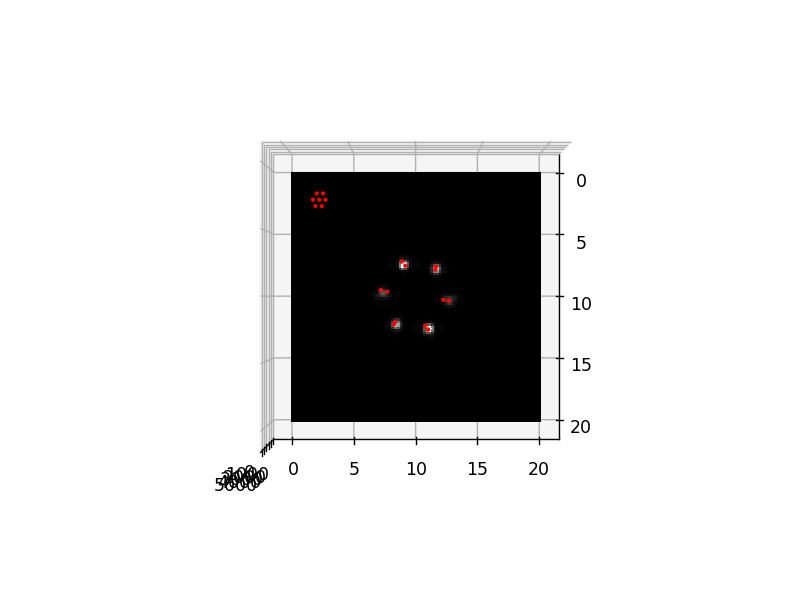

<ipython-input-21-4339a2747148>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection="3d")


In [21]:
i=2
peakz[df[i]]=np.ones_like(peak[df[i]][:,0])
fig = plt.figure()
plt.gca().set_aspect('equal')
ax = plt.axes(projection="3d")
#for i in range(len(df)):
ax.plot_surface(y[df[i]],x[df[i]],z[df[i]],cmap=plt.cm.gray,linewidth=0, antialiased=False, rcount=200, ccount=200 )
ax.scatter3D(peak[df[i]][:, 0], peak[df[i]][:, 1],peakz[df[i]]*5000,'.',s=2,color='red')
ax.view_init(90, 0)
#plt.xlim(0,50)
#plt.ylim(0,50)
#plt.axis('off')
#plt.title('30 nm x 30 nm')
#plt.savefig('18c24T0015.png')

<IPython.core.display.Javascript object>


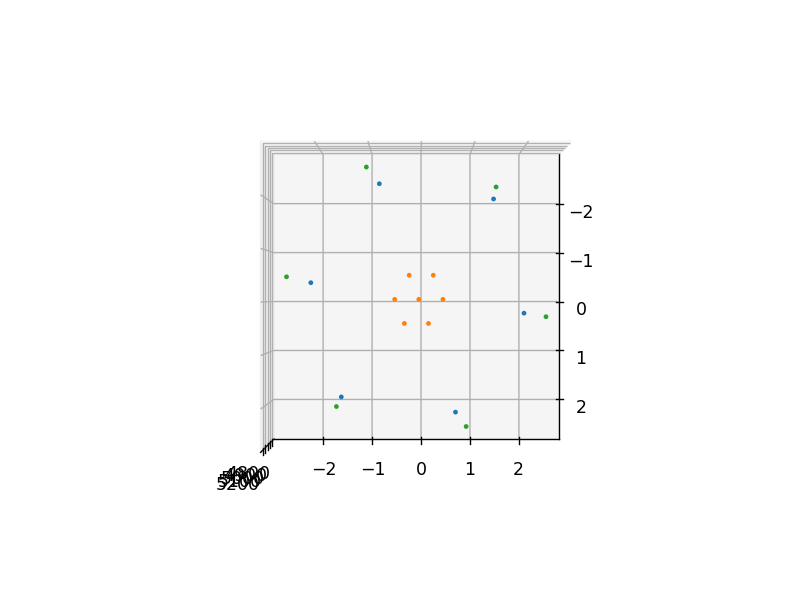

<ipython-input-26-acf968bfef53>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection="3d")


In [26]:
fig = plt.figure()
plt.gca().set_aspect('equal')
ax = plt.axes(projection="3d")
for i in range(len(df)):
    ax.scatter3D(peak[df[i]][:, 0]-x[df[i]][0,-1]/2, peak[df[i]][:, 1]-x[df[i]][0,-1]/2,peakz[df[i]]*5000,'.',s=3)
ax.view_init(90, 0)

In [27]:
for i in range(len(df)):
    print(fpa[df[i]])

[[-0.37222222 -2.15888889]
 [ 0.22333333  2.01      ]
 [-2.01        1.41444444]
 [ 1.86111111 -1.56333333]
 [-2.30777778 -0.81888889]
 [ 2.15888889  0.67      ]]
[[-0.04713115 -0.04713115]
 [-0.51844262 -0.23565574]
 [ 0.42418033  0.14139344]
 [-0.51844262  0.23565574]
 [ 0.42418033 -0.32991803]
 [-0.04713115 -0.51844262]
 [-0.04713115  0.42418033]]
[[-2.63446602 -1.07330097]
 [ 2.43932039  0.87815534]
 [-2.24417476  1.46359223]
 [ 2.04902913 -1.65873786]
 [-0.48786408 -2.63446602]
 [ 0.29271845  2.43932039]]


In [28]:
with open('fftpeaks.txt', 'w') as f:
    print(fpa, file=f)